# Project Name -Titanic Project

We are going to perform Logisttic Regression on titanic_train dataset.The input data is .csv format with 891 rows and 12 columns.

Discription -

1. Age - Age in years
2. Survival - 0=No, 1=Yes
3. Pclass - 1=1st class, 2=2nd class, 3=3rd class
4. Sex - Male/Female
5. cabin - Cabin number

Our Target is pridict weather the passenger survives the deadline disaster or not which has logistic data so we use logistic regression.

# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading The Data Set -

Reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv') 

In [3]:
train.head()#printing first 5 rows of data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape ##Cheaking data dimension

(891, 12)

dataset has 891 rows and 4 columns.

In [5]:
train.describe() #Staistical summary 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info #Cheaking the datatype of all the columns

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

There are categorical columns exists in this data set so encoding is needed.

In [7]:
train.isnull().sum() #checking if null is present in the dataset.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null value (age,cabin,Embarked) is present in data set.

# Exploratory Data Analysis (EDA)-

In [8]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


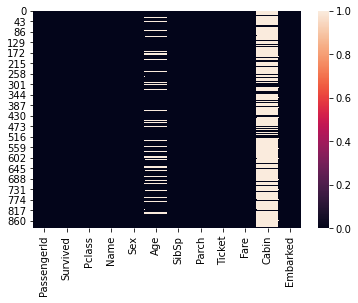

In [9]:
#missing data
sns.heatmap(train.isnull())

shown in the heatmap, Cabin, Age and Embarked has missing values respectively.

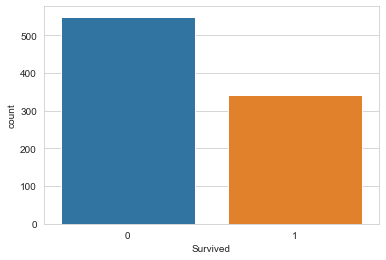

In [10]:
#Cheaking Survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

 Shown the graph 500+ passengers not survived and 300+ passengers survived.

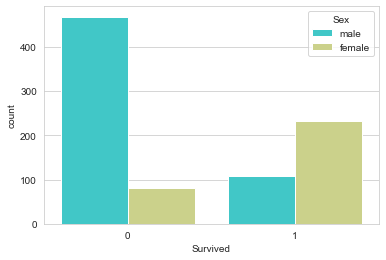

In [11]:
#Checking survived with sex

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

In the category more females did survived.

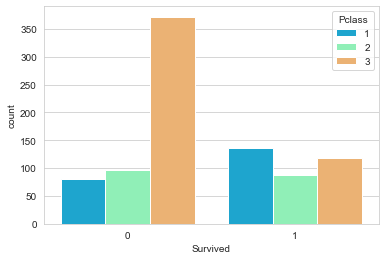

In [12]:
# Cheacking survived with Pclass

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In the Graphical representation, the lower class passengers died extremely more than the middle class and first class.

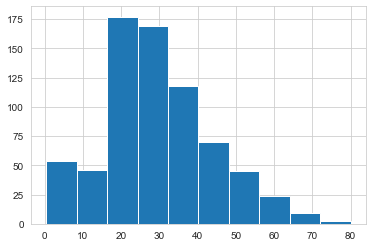

In [13]:
train['Age'].hist()

The age group most of the passengers is within 20–40 years.

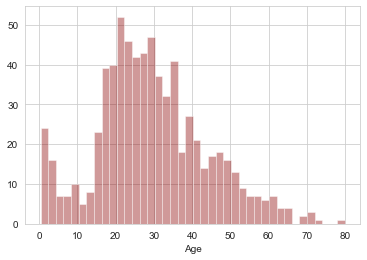

In [14]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

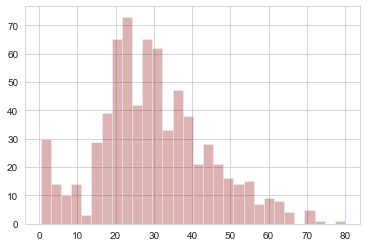

In [15]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

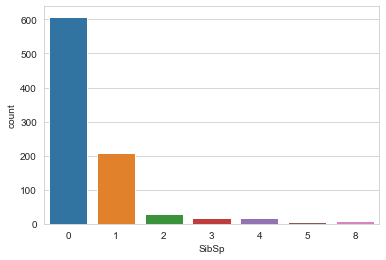

In [16]:
#Survived and SibSp
sns.countplot(x='SibSp',data=train)

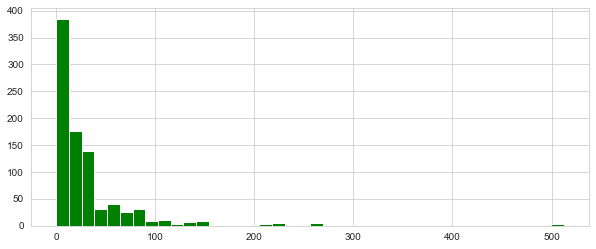

In [19]:
train['Fare'].hist(color='green',bins=40,figsize=(10,4))

___
# Data Cleaning
We want to fill in missing age data instead of just droping, by filling in the mean age of all the passengers check the average age by passenger class.


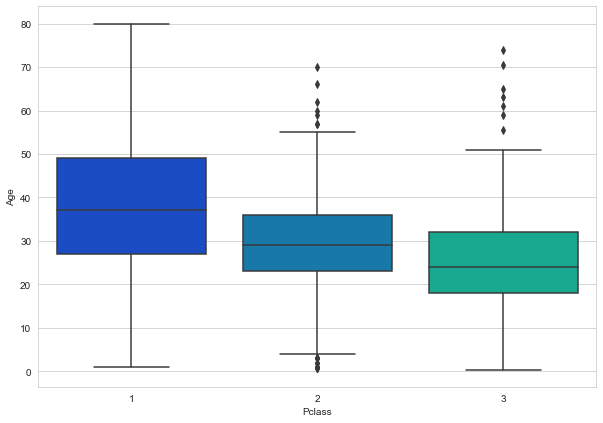

In [21]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

 We'll use these average age values to impute based on Pclass for Age.

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now applying that function.

In [23]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again.

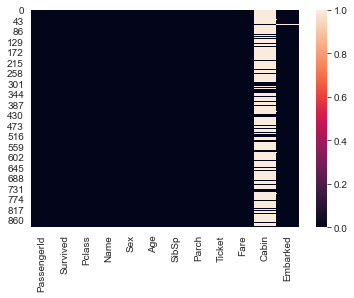

In [26]:
sns.heatmap(train.isnull())

Now droping the Cabin column and the row in Embarked that is NaN.

In [27]:
train.drop('Cabin',axis=1,inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.dropna(inplace=True)

## Converting Categorical Features 

Now we need to convert categorical features.

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [50]:
train = pd.concat([train,sex,embark],axis=1)

NameError: name 'sex' is not defined

In [36]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Our data is ready for our model.

# Building a Logistic Regression model

splitting our data into a training set and test set.

## Train Test Split

In [37]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [38]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix


In [45]:

accuracy=confusion_matrix(y_test,predictions)

In [46]:
accuracy

array([[133,  21],
       [ 60,  54]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.6977611940298507

In [55]:
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0], dtype=int64)

Now evaluating our model.

# Evaluating-

checking precision,recall using classification report.

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       154
           1       0.72      0.47      0.57       114

    accuracy                           0.70       268
   macro avg       0.70      0.67      0.67       268
weighted avg       0.70      0.70      0.68       268



approx 70 % accuracy, 67 precision, recall, and f1-score.